In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
from scipy.sparse import issparse  # Import issparse
from collections import Counter

In [7]:
data = sc.read_h5ad("data/perturbData/TianKampmann2021_CRISPRa.h5ad")
meta_data = pd.DataFrame(data.obs)
gene_exp = pd.DataFrame(data.X.toarray())

max_num = np.max(data.X.toarray())
print(max_num)

# Count how many zeros
zero_count = np.count_nonzero(data.X.toarray() == 0)
print(gene_exp.shape)

5301.0
(21193, 33538)


In [4]:
perturb_data_dir = "data/perturbData/"
unique_perturbations = []
datasets = []
perturb_count = 1

for file in os.listdir(perturb_data_dir):
    if file.endswith(".h5ad"):
        adata = sc.read_h5ad(perturb_data_dir + file)
        meta_data = pd.DataFrame(adata.obs)
        if "perturbation" in meta_data.columns:
            perturbation = meta_data["perturbation"].unique().tolist()
            # perturbation = Counter(meta_data["perturbation"].tolist())
            # perturbation = [(k, v) for k, v in perturbation.items()]
            print("Perturbation count: ", perturb_count)
            perturb_count += 1
        else:
            perturbation = np.nan

        unique_perturbations.append(perturbation)
        datasets.append(file)

perturb_df = pd.DataFrame.from_records(unique_perturbations).T
perturb_df.columns = datasets

perturb_df.to_csv("data/perturbations.tsv", index=False, sep="\t")

Perturbation count:  1
Perturbation count:  2
Perturbation count:  3
Perturbation count:  4
Perturbation count:  5
Perturbation count:  6
Perturbation count:  7


In [2]:
perturb_df = pd.read_csv("data/perturbations.csv", sep=",")
perturb_df.head()

/var/folders/0z/_9h6zw2x0sx2p1s_zxl52pjr0000gn/T/ipykernel_16430/1134288272.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  perturb_df = pd.read_csv("data/perturbations.csv", sep=",")


,ChangYe2021.h5ad,FrangiehIzar2021_RNA.h5ad,TianKampmann2021_CRISPRi.h5ad,ZhaoSims2021.h5ad,DatlingerBock2021.h5ad,GasperiniShendure2019_lowMOI.h5ad,GasperiniShendure2019_highMOI.h5ad,ReplogleWeissman2022_K562_essential.h5ad,DatlingerBock2017.h5ad,FrangiehIzar2021_protein.h5ad,...,NormanWeissman2019_filtered.h5ad,ReplogleWeissman2022_rpe1.h5ad,TianKampmann2019_day7neuron.h5ad,AdamsonWeissman2016_GSM2406681_10X010.h5ad,ShifrutMarson2018.h5ad,AdamsonWeissman2016_GSM2406677_10X005.h5ad,TianKampmann2021_CRISPRa.h5ad,TianKampmann2019_iPSC.h5ad,ReplogleWeissman2022_K562_gwps.h5ad,AdamsonWeissman2016_GSM2406675_10X001.h5ad
0,control,HLA-B,CREBBP,panobinostat,ZAP70_1,TOP1,CERS2_chr10:23105418-23105441_chr11:65708668-6...,NAF1,control,HLA-B,...,ARID1A,MRPS31,UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A...,63(mod)_pBA580,control,3x_neg_ctrl_pMJ144-1,KSR2,PPP2R1A_PPCDC_MAT2A_MVK_MMAB_PMVK,CTSC,CREB1_pDS269
1,erlotinib,NGFR,SH3RF1,control,ZAP70_2,ZNF273,C16orf91_chr10:72420587-72420610_chr10:7406807...,BUB1,Tcrlibrary_JUND_2,NGFR,...,BCORL1,LRRC37A3,control,OST4_pDS353,ES.sg35.TCEB2,3x_neg_ctrl_pMJ144-2,CCDC85C,MMAB_MAT2A,CWC25,SNAI1_pDS266
2,GNE-069,NMRK1,TAF1,etoposide,LCK_1,chr4:84540211-84540234,ADIPOR1_APEX1_chr1:182308166-182308189_chr1:20...,UBL5,Tcrlibrary_BACH2_3,NMRK1,...,FOSB,SRCAP,MAP3K12,SEC61A1_pDS031,ES.sg2.BTLA,ATF6_PERK_IRE1_pMJ158,CASP3,HMGCS1_PPP2R1A_UBA1_UQCRQ_FECH_RAB7A_MAT2A_MVK...,PDE4DIP,62(mod)_pBA581
3,GNE-104,control,UBTD2,Ana-12,LCK_2,chr1:26826520-26826543,chr1:224392421-224392444_chr1:39251330-3925135...,C9orf16,Tcrlibrary_NFKB2_3,control,...,SET_KLF1,WBP1,PMVK_MAT2A,EIF2B4_pDS491,ES.sg33.STAT6,ATF6_PERK_pMJ150,TTBK2,HMGCS1,ZZEF1,EP300_pDS268
4,NaN,IFNGR1,FRMD4A,RO4929097,LAT_1,chr14:69216270-69216293_chr19:34656285-34656308,chr1:154601602-154601625_chr12:131713939-13171...,TIMM9,Tcrlibrary_JUN_1,IFNGR1,...,OSR2,RRP12,LSS,SRPR_pDS482,ES.sg7.CBLB,ATF6_only_pMJ145,PRNP,PPP2R1A,SNAPIN,ZNF326_pDS262


Upon examining the perturbation metadata across various datasets from the scPerturb resource, several patterns emerge in the formatting of the perturbation column:

1. **Single-Gene Perturbations**: Entries often consist of a single gene name, indicating that the perturbation targets that specific gene. For example:
   - `HLA-B`
   - `CREBBP`
   - `SH3RF1`

2. **Chemical or Drug Treatments**: Some entries denote chemical compounds or drugs used as perturbing agents. Examples include:
   - `erlotinib`
   - `panobinostat`
   - `GNE-069`

3. **Control Conditions**: The term `control` is used to represent baseline or unperturbed conditions across multiple datasets.

4. **Genomic Coordinates**: Certain perturbations are specified by genomic loci, particularly in CRISPR-based screens targeting non-coding regions. These are formatted as chromosomal coordinates, such as:
   - `chr4:84540211-84540234`
   - `chr1:26826520-26826543`

5. **Multi-Gene Perturbations**: Some entries list multiple genes separated by underscores or commas, indicating combined perturbations affecting several genes simultaneously. For instance:
   - `PPP2R1A_PPCDC_MAT2A_MVK_MMAB_PMVK`
   - `UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A`

6. **CRISPR Guide Identifiers**: In datasets involving CRISPR perturbations, entries may include specific guide RNA identifiers, often prefixed with terms like `Tcrlibrary` or `ES.sg`, such as:
   - `Tcrlibrary_JUND_2`
   - `ES.sg35.TCEB2`

7. **Modified Gene Names or Constructs**: Some perturbations reference modified genes or constructs, indicated by suffixes like `_pDS269` or prefixes such as `63(mod)_`, exemplified by:
   - `CREB1_pDS269`
   - `63(mod)_pBA580`

These patterns suggest that the perturbation column encapsulates a diverse range of perturbation types, each adhering to specific naming conventions pertinent to the experimental design and perturbation methodology of the respective dataset.

In [11]:
# Collect every cell values in list
perturb_values = perturb_df.values.flatten()
perturb_values = [x for x in perturb_values if str(x) != 'nan']
perturb_tfs = [x.split("_")[0] for x in perturb_values]
perturb_tfs = list(set(perturb_tfs))
print(len(perturb_tfs))

14571


In [3]:
prior_data = pd.read_csv("data/prior_data.csv", sep=",")
print(prior_data.shape)
prior_data.head()

(11839, 3)


,tf,action,target
0,MAK,1.0,KLK3
1,XBP1,1.0,TPP1
2,KLF5,1.0,CXCR4
3,ATF3,-1.0,SELE
4,MYC,1.0,EIF4G1


In [5]:
prior_tfs = prior_data['tf'].unique().tolist()
print(len(prior_tfs))

1918


In [12]:
# Find common TFs in prior data and perturbation data
common_tfs = list(set(prior_tfs).intersection(perturb_tfs))
print(len(common_tfs))  # 1399, which is high number

1399


### Analyzing the results

In [6]:
import pandas as pd
import os

directory = "data/results/"

for file in os.listdir(directory):
    if file.endswith(".h5ad"):
        print(f"Processing file: {file}")
        meta_data_file = f"{directory}{file}_metadata.tsv"
        bh_corr_file = f"{directory}{file}_bh_correction.tsv"
        pvalue_file = f"{directory}{file}_p_values.tsv"
        output_file = f"{directory}{file}_output.tsv"

        if not os.path.exists(meta_data_file):
            print(f"Meta data file does not exist for {file}")
            exit()
        if not os.path.exists(bh_corr_file):
            print(f"BH correction file does not exist for {file}")
            exit()

        meta_data = pd.read_csv(meta_data_file, sep="\t", index_col=0)
        bh_corr = pd.read_csv(bh_corr_file, sep="\t", index_col=0, low_memory=False)
        p_values = pd.read_csv(pvalue_file, sep="\t", index_col=0, low_memory=False)
        analyzed_tfs = bh_corr.columns.tolist()

        # Extract unique perturbations from the metadata
        perturbations = meta_data["perturbation"].unique()
        output = []

        for perturbation in perturbations:
            perturbed_meta = meta_data[meta_data["perturbation"] == perturbation]
            perturbed_bh_corr = bh_corr[bh_corr.index.isin(perturbed_meta.index)]
            perturbed_meta = perturbed_meta[perturbed_meta.index.isin(perturbed_bh_corr.index)]

            if perturbation not in analyzed_tfs:
                print(f"No BH correction data for this perturbation: {perturbation}")
                continue

            # Count the cells activated, inactivated, or missing which are perturbed
            perturbed_cells = len(perturbed_bh_corr)

            significant_cells = perturbed_bh_corr[perturbed_bh_corr[perturbation] == True]
            significant_cells = significant_cells[[perturbation]]

            significant_cells_p_values = p_values[p_values.index.isin(significant_cells.index)]
            significant_cells_p_values = significant_cells_p_values[[perturbation]]

            activated_cells = len(significant_cells_p_values[significant_cells_p_values[perturbation] > 0])
            inactivated_cells = len(significant_cells_p_values[significant_cells_p_values[perturbation] < 0])
            missing_cells = perturbed_cells - activated_cells - inactivated_cells
            insignificant_cells = len(perturbed_bh_corr[perturbed_bh_corr[perturbation] == False])

            # Count the cells activated, inactivated, or missing which are not perturbed
            not_perturbed_bh_corr = bh_corr.drop(perturbed_meta.index)
            not_perturbed_cells = len(not_perturbed_bh_corr)

            significant_not_perturbed_cells = not_perturbed_bh_corr[not_perturbed_bh_corr[perturbation] == True]
            significant_not_perturbed_cells = significant_not_perturbed_cells[[perturbation]]

            significant_not_perturbed_cells_p_values = p_values[
                p_values.index.isin(significant_not_perturbed_cells.index)]
            significant_not_perturbed_cells_p_values = significant_not_perturbed_cells_p_values[[perturbation]]

            activated_not_perturbed_cells = len(
                significant_not_perturbed_cells_p_values[significant_not_perturbed_cells_p_values[perturbation] > 0])
            inactivated_not_perturbed_cells = len(
                significant_not_perturbed_cells_p_values[significant_not_perturbed_cells_p_values[perturbation] < 0])
            missing_not_perturbed_cells = not_perturbed_cells - activated_not_perturbed_cells - inactivated_not_perturbed_cells
            insignificant_not_perturbed_cells = len(not_perturbed_bh_corr[not_perturbed_bh_corr[perturbation] == False])

            # Append the results to the output dataframe
            output.append(
                {
                    "Perturbation": perturbation,
                    "Total Perturbed Cells": perturbed_cells,
                    "Activated Perturbed Cells": activated_cells,
                    "Inactivated Perturbed Cells": inactivated_cells,
                    "Missing Perturbed Cells": missing_cells,
                    "Insignificant Perturbed Cells": insignificant_cells,
                    "Total Not Perturbed Cells": not_perturbed_cells,
                    "Activated Not Perturbed Cells": activated_not_perturbed_cells,
                    "Inactivated Not Perturbed Cells": inactivated_not_perturbed_cells,
                    "Missing Not Perturbed Cells": missing_not_perturbed_cells,
                    "Insignificant Not Perturbed Cells": insignificant_not_perturbed_cells
                }
            )

        result = pd.DataFrame(output)
        result.to_csv(output_file, sep="\t", index=False)
        print(f"Results saved to {output_file}")

Processing file: FrangiehIzar2021_RNA.h5ad
No BH correction data for this perturbation: HLA-B
No BH correction data for this perturbation: NGFR
No BH correction data for this perturbation: NMRK1
No BH correction data for this perturbation: control
No BH correction data for this perturbation: IFNGR1
No BH correction data for this perturbation: C6orf226
No BH correction data for this perturbation: EMP1
No BH correction data for this perturbation: CD63
No BH correction data for this perturbation: PIK3IP1
No BH correction data for this perturbation: SPESP1
No BH correction data for this perturbation: PPIA
No BH correction data for this perturbation: SAT1
No BH correction data for this perturbation: POLD2
No BH correction data for this perturbation: TPP1
No BH correction data for this perturbation: NUP50-AS1
No BH correction data for this perturbation: PRELID3B
No BH correction data for this perturbation: CTSB
No BH correction data for this perturbation: DDX17
No BH correction data for this

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

plt.rcParams['figure.max_open_warning'] = 500  # Increase the threshold

directory = "data/results/"

for file in os.listdir(directory):
    if file.endswith(".h5ad"):
        print(f"Processing file: {file}")
        output_file = f"{directory}{file}_output.tsv"

        if not os.path.exists(output_file):
            print(f"Output file does not exist for {file}")
            exit()

        output_df = pd.read_csv(output_file, sep="\t", index_col=0)
        collect_fig = []

        for _row in output_df.iterrows():
            row = _row[1]
            perturb_tf = row.name

            # {
            #         "Perturbation": perturbation,
            #         "Total Perturbed Cells": perturbed_cells,
            #         "Activated Perturbed Cells": activated_cells,
            #         "Inactivated Perturbed Cells": inactivated_cells,
            #         "Missing Perturbed Cells": missing_cells,
            #         "Insignificant Perturbed Cells": insignificant_cells,
            #         "Total Not Perturbed Cells": not_perturbed_cells,
            #         "Activated Not Perturbed Cells": activated_not_perturbed_cells,
            #         "Inactivated Not Perturbed Cells": inactivated_not_perturbed_cells,
            #         "Missing Not Perturbed Cells": missing_not_perturbed_cells,
            #         "Insignificant Not Perturbed Cells": insignificant_not_perturbed_cells
            #     }

            # activated = row["ActivatedCells"]
            # inactivated = row["InactivatedCells"]
            # missing = row["MissingCells"]
            # total_not_perturbed = row["TotalNotPerturbedCells"]
            # activated_not_perturbed = row["ActivatedNotPerturbedCells"]
            # inactivated_not_perturbed = row["InactivatedNotPerturbedCells"]
            # missing_not_perturbed = row["MissingNotPerturbedCells"]

            # df = pd.DataFrame(
            #     [[inactivated, inactivated_not_perturbed],
            #      [missing, missing_not_perturbed],
            #      [activated, activated_not_perturbed]],
            #     index=['Not Activated', 'Missing', 'Activated'],
            #     columns=['Perturbed', 'Not Perturbed']
            # )

            df = pd.DataFrame(
                [
                    [row["Activated Perturbed Cells"], row["Activated Not Perturbed Cells"]],
                    [row["Inactivated Perturbed Cells"], row["Inactivated Not Perturbed Cells"]],
                    [row["Missing Perturbed Cells"], row["Missing Not Perturbed Cells"]],
                    [row["Insignificant Perturbed Cells"], row["Insignificant Not Perturbed Cells"]],
                    [row["Total Perturbed Cells"], row["Total Not Perturbed Cells"]]
                ],
                index=['Active', 'Inactive', 'Missing', "Insignificant", "Total"],
                columns=['Perturbed', 'Not Perturbed']
            )

            # Create a heatmap with annotations
            fig = plt.figure(figsize=(4, 4))
            plt.title(perturb_tf)
            sns.heatmap(df, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.xlabel('')
            plt.ylabel('')
            plt.yticks(rotation=0)

            # Adjust layout to include all elements
            plt.tight_layout()

            collect_fig.append(fig)

        # Save the plots to a PDFZed
        pdf_filename = f"{directory}{file}_plots.pdf"
        with PdfPages(pdf_filename) as pdf:
            for fig in collect_fig:
                pdf.savefig(fig, bbox_inches='tight', pad_inches=0.1)
                plt.close(fig)  # Free memory by closing the figure
        print(f"Plots saved to {pdf_filename}")

Processing file: FrangiehIzar2021_RNA.h5ad
Plots saved to data/results/FrangiehIzar2021_RNA.h5ad_plots.pdf
Processing file: TianKampmann2021_CRISPRi.h5ad
Plots saved to data/results/TianKampmann2021_CRISPRi.h5ad_plots.pdf
Processing file: ReplogleWeissman2022_K562_essential.h5ad
Plots saved to data/results/ReplogleWeissman2022_K562_essential.h5ad_plots.pdf
Processing file: ReplogleWeissman2022_rpe1.h5ad
Plots saved to data/results/ReplogleWeissman2022_rpe1.h5ad_plots.pdf
Processing file: TianKampmann2021_CRISPRa.h5ad
Plots saved to data/results/TianKampmann2021_CRISPRa.h5ad_plots.pdf


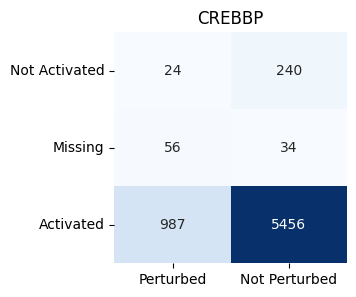

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Put your data in a Pandas DataFrame
df = pd.DataFrame(
    [[24, 240],
     [56, 34],
     [987, 5456]],
    index=['Not Activated', 'Missing', 'Activated'],
    columns=['Perturbed', 'Not Perturbed']
)

# Create a heatmap with annotations
plt.figure(figsize=(3, 3))
plt.title("CREBBP")
sns.heatmap(df, annot=True, fmt='d', cmap='Blues', cbar=False)

# Optional: tidy up axis labels
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)  # Keep row labels horizontal

plt.show()
